--- 
# Feature Selection Notebook 
---

---
## Imports
---

In [0]:
# List files in /FileStore/tables to confirm your CSV is there
display(dbutils.fs.ls("/FileStore/tables"))

path name size modificationTime dbfs:/FileStore/tables/2025_03_11___DBFS_Example_Classifier.ipynb 2025_03_11___DBFS_Example_Classifier.ipynb 68203 1742288094000 dbfs:/FileStore/tables/Clean_IMDBnew.csv Clean_IMDBnew.csv 11897936 1748379618000 dbfs:/FileStore/tables/Clean_IMDBnew.parquet/ Clean_IMDBnew.parquet/ 0 0 dbfs:/FileStore/tables/IMDB_CLEAN.csv IMDB_CLEAN.csv 16096967 1748425316000 dbfs:/FileStore/tables/IMDB_CLEAN.parquet/ IMDB_CLEAN.parquet/ 0 0 dbfs:/FileStore/tables/IMDB_Cleaned/ IMDB_Cleaned/ 0 0 dbfs:/FileStore/tables/IMDB_cleannew.csv IMDB_cleannew.csv 16096967 1748387484000 dbfs:/FileStore/tables/Imdb_Movie_Dataset-1.csv Imdb_Movie_Dataset-1.csv 392283051 1746882391000 dbfs:/FileStore/tables/Imdb_Movie_Dataset-4.csv/ Imdb_Movie_Dataset-4.csv/ 0 0 dbfs:/FileStore/tables/Imdb_Movie_Dataset.csv/ Imdb_Movie_Dataset.csv/ 0 0 dbfs:/FileStore/tables/archive-1.zip archive-1.zip 160786298 1746877527000 dbfs:/FileStore/tables/archive-2.zip archive-2.zip 160786298 1746877987000 dbfs:/FileStore/tables/archive-3.zip archive-3.zip 160786298 1746878808000 dbfs:/FileStore/tables/archive-4.zip archive-4.zip 160786298 1746879282000 dbfs:/FileStore/tables/archive.zip archive.zip 160786298 1746877512000 dbfs:/FileStore/tables/df_checkpoint/ df_checkpoint/ 0 0 dbfs:/FileStore/tables/df_checkpoint.csv df_checkpoint.csv 400384270 1747316983000 dbfs:/FileStore/tables/imdb_movie_sample/ imdb_movie_sample/ 0 0 dbfs:/FileStore/tables/iris-1.csv iris-1.csv 3858 1742288473000 dbfs:/FileStore/tables/iris.csv iris.csv 3858 1741869427000

In [0]:
# if you run the previous notebook uncomment
df = spark.read.parquet("dbfs:/FileStore/tables/IMDB_CLEAN.parquet")

# Otherwise, define the path to your uploaded CSV
#csv_path = "dbfs:/FileStore/tables/IMDB_CLEAN.csv"

# Read the CSV into a DataFrame with header and schema inference
#df = (spark.read
#      .format("csv")
#      .option("header", "true")       # first line as column names
#      .option("inferSchema", "true")  # auto-detect data types
#      .option("sep", ",")             # delimiter
#      .load(csv_path)
#)

# Inspect the dataframe
display(df)          # Databricks display
df.printSchema()     # Verify columns & types
df.count()           # Check the total number of rows

id title vote_average vote_count status release_date revenue runtime adult budget imdb_id original_language original_title overview popularity tagline genres production_companies production_countries spoken_languages keywords en_bool tagline_bool genres_array action adventure comedy drama thriller prod_companies_array warner_bros_pictures universal_pictures 20th_century_fox keywords_array sequel duringcreditsstinger based_on_novel_or_book 174104 The Spoilers 6.2 3 Released 4/10/1914 4100000 110 false 0 tt0004630 en The Spoilers The Spoilers is a 1914 film directed by Colin Campbell. It is set in Nome, Alaska during the 1898 Gold Rush, with William Farnum as Roy Glennister, Kathlyn Williams as Cherry Malotte, and Tom Santschi as Alex McNamara. The film culminates in a spectacular saloon fistfight between Glennister and McNamara. It was adapted to screen by Lanier Bartlett from the Rex Beach novel of the same name. 0.6 null Romance, Western Selig Polyscope Company United States of America null alaska, silent film, nome alaska, saloon brawl, klondike gold rush, partially lost film 1 0 List(Romance, Western) 0 0 0 0 0 List(Selig Polyscope Company) 0 0 0 List(alaska, silent film, nome alaska, saloon brawl, klondike gold rush, partially lost film) 0 0 0 618 The Birth of a Nation 6.034 482 Released 2/8/1915 11000000 193 false 100000 tt0004972 en The Birth of a Nation Two families, abolitionist Northerners the Stonemans and Southern landowners the Camerons, intertwine. When Confederate colonel Ben Cameron is captured in battle, nurse Elsie Stoneman petitions for his pardon. In Reconstruction-era South Carolina, Cameron founds the Ku Klux Klan, battling Elsie's congressman father and his African-American protégé, Silas Lynch. 13.791 The Fiery Cross of the Ku Klux Klan! Drama, History, War Epoch Film Co. United States of America No Language army, ku klux klan, southern usa, racist, silent film, american civil war, reconstruction era, controversial 1 1 List(Drama, History, War) 0 0 0 1 0 List(Epoch Film Co.) 0 0 0 List(army, ku klux klan, southern usa, racist, silent film, american civil war, reconstruction era, controversial) 0 0 0 70368 The Cheat 5.983 58 Released 12/13/1915 137365 59 false 17311 tt0005078 en The Cheat A venal, spoiled stockbroker's wife impulsively embezzles $10,000 from the charity she chairs and desperately turns to a Burmese ivory trader to replace the stolen money. 3.104 null Drama Jesse L. Lasky Feature Play Company, Paramount United States of America No Language null 1 0 List(Drama) 0 0 0 1 0 List(Jesse L. Lasky Feature Play Company, Paramount) 0 0 0 null 0 0 0 30266 20,000 Leagues Under the Sea 6.3 48 Released 12/24/1916 8000000 85 false 200000 tt0006333 en 20,000 Leagues Under the Sea Captain Nemo has built a fantastic submarine for his mission of revenge. He has traveled over 20,000 leagues in search of Charles Denver - a man who caused the death of Princess Daaker. Seeing what he had done, Denver took the daughter to his yacht and sailed away. 3.474 The First Submarine Photoplay Ever Filmed Adventure, Drama, Action, Science Fiction The Universal Film Mfg. Co. Bahamas, United States of America English revenge, captain nemo 1 1 List(Adventure, Drama, Action, Science Fiction) 1 1 0 1 0 List(The Universal Film Mfg. Co.) 0 0 0 List(revenge, captain nemo) 0 0 0 278480 A Daughter of the Gods 3.5 2 Released 10/16/1916 1390000 180 false 1000000 tt0006568 en A Daughter of the Gods A sultan agrees to help an evil witch destroy a mysterious beauty if the witch will bring his young son back to life. 0.887 null Fantasy, Drama Fox Film Corporation United States of America null null 1 0 List(Fantasy, Drama) 0 0 0 1 0 List(Fox Film Corporation) 0 0 0 null 0 0 0 132410 The Ghost of Slumber Mountain 6.0 8 Released 11/17/1918 3000 16 false 3000 tt0009105 en The Ghost of Slumber Mountain In a dream Uncle Jack looks through a magic telescope owned by the ghost of a hermit and sees what life was like millions of years ago, includi

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: double (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: long (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- budget: long (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- tagline: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- en_bool: integer (nullable = true)
 |-- tagline_bool: integer (nullable = true)
 |-- genres_array: array (nullabl

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import (col, count, when, isnan, row_number, to_date, split, regexp_replace, expr, corr)

from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import ChiSqSelector, VectorAssembler, QuantileDiscretizer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor



In [0]:
print(df.columns)

# Print the number of columns in the DataFrame
num_cols = len(df.columns)
print(f"Number of columns in df: {num_cols}")

['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'budget', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'en_bool', 'tagline_bool', 'genres_array', 'action', 'adventure', 'comedy', 'drama', 'thriller', 'prod_companies_array', 'warner_bros_pictures', 'universal_pictures', '20th_century_fox', 'keywords_array', 'sequel', 'duringcreditsstinger', 'based_on_novel_or_book']
Number of columns in df: 37



### Original 21 Columns – Feature Engineering Summary

| Column Name             | Action Taken / Reason                                                         |
|------------------------|--------------------------------------------------------------------------------|
| id                     | Dropped (identifier, no target relationship)                                   |
| title                  | Dropped (text, should not affect revenue)                                      |
| vote_average           | Kept (numeric feature)                                                         |
| vote_count             | Kept (numeric feature)                                                         |
| status                 | Kept (categorical)                                                             |
| release_date           | Dropped (transformed into `release_day`, `release_month`, `release_year`)     |
| revenue                | Kept (target variable)                                                         |
| runtime                | Kept (numeric feature)                                                         |
| adult                  | Kept (boolean)                                                                 |
| budget                 | Kept (numeric feature)                                                         |
| imdb_id                | Dropped (identifier)                                                           |
| original_language      | Dropped (transformed into `en_bool`)                                           |
| original_title         | Dropped (text)                                                                 |
| overview               | Dropped (long text, transformations needed)                                    |
| popularity             | Kept (numeric feature)                                                         |
| tagline                | Dropped (created `tagline_bool` for boolean present/abs)                       |
| genres                 | Dropped (created boolean columns for top 5 genres)                             |
| production_companies   | Dropped (created boolean columns for top 3 companies)                          |
| production_countries   | Dropped (would need further cleaning)                                          |
| spoken_languages       | Dropped (high cardinality – potential future work)                             |
| keywords               | Dropped (created boolean columns for top 3 keywords)                           |


In [0]:
# Drop unwanted columns
df = df.drop('id', # identifier; no relationship to our target
            'title', # text
            #'vote_average', 
            #'vote_count', 
            #'status', 
            #'revenue', 
            #'runtime', 
            #'adult', 
            #'budget', 
            'imdb_id', # identifier; no relationship to our target
            'original_language', # high cardinality (90 unique values) --> created "en_bool"
            'original_title', # text
            'overview', # long text
            #'popularity', 
            'tagline', # text --> created a boolean column 'tagline_bool'
            'genres', # created boolean columns based on 5 most profitable genres
            'genres_array',
            #top5_genres: ['action', 'adventure', 'comedy', 'drama', 'thriller']
            'production_companies', # high cardinality (16748); created boolean columns for top 3 profitable companies
            'prod_companies_array',
            #top3_prod: ['warner_bros_pictures', 'universal_pictures', '20th_century_fox']
            'production_countries', # needs more cleaning
            'spoken_languages', # too high cardinality; might require more work later
            'keywords', # might create boolean columns with top 5 most profitable taglines
            # top3: ['sequel', 'duringcreditsstinger', 'based_on_novel_or_book']
            'keywords_array',
            'release_date', # We will use "release_day", "release_month", "release_year"
            #'release_day', 
            #'release_month', 
            #'release_year',
             )

### Final Selected Features with Data Types

| Feature Name                | Data Type        |
|----------------------------|------------------|
| vote_average               | double           |
| vote_count                 | integer          |
| status                     | string           |
| revenue *(target)*         | long             |
| runtime                    | integer          |
| adult                      | boolean          |
| budget                     | long             |
| popularity                 | double           |
| en_bool                    | integer          |
| release_day                | integer          |
| release_month              | integer          |
| release_year               | integer          |
| tagline_bool               | integer          |
| action                     | integer          |
| adventure                  | integer          |
| comedy                     | integer          |
| drama                      | integer          |
| thriller                   | integer          |
| warner_bros_pictures       | integer          |
| universal_pictures         | integer          |
| 20th_century_fox           | integer          |
| sequel                     | integer          |
| duringcreditsstinger       | integer          |
| based_on_novel_or_book     | integer          |


In [0]:
print(df.columns)
# Print the number of columns in df after dropping the columns
num_cols = len(df.columns)
print(f"Number of features in df after dropping columns: {num_cols}")

['vote_average', 'vote_count', 'status', 'revenue', 'runtime', 'adult', 'budget', 'popularity', 'en_bool', 'tagline_bool', 'action', 'adventure', 'comedy', 'drama', 'thriller', 'warner_bros_pictures', 'universal_pictures', '20th_century_fox', 'sequel', 'duringcreditsstinger', 'based_on_novel_or_book']
Number of features in df after dropping columns: 21


---
## Check missing values 
---

In [0]:
# To check the type of each feature
df.printSchema()
# Function to calculate missing values by column
def missing_values_table_spark(df):
    """
    Calculates the total number and percentage of missing (null) values 
    for each column in a PySpark DataFrame.

    Returns a Pandas DataFrame with columns:
    - 'Column': column name
    - 'Missing Values': count of missing values
    - '% of Total Values': percentage of missing values
    
    Only columns with missing values are included, sorted in descending order.
    """
    # Calculate the total missing values for each column
    mis_val = df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns])

    # Convert to Pandas for easier handling
    mis_val_pd = mis_val.toPandas().transpose()

    # Calculate the percentage of missing values for each column
    mis_val_percent = (mis_val_pd[0] / df.count()) * 100

    # Create a new table combining count and percentage
    mis_val_table = pd.concat([mis_val_pd, mis_val_percent], axis=1)
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Keep only columns with >0% missing, sort descending, round
    mis_val_table = (
        mis_val_table[mis_val_table['% of Total Values'] > 0]
        .sort_values('% of Total Values', ascending=False)
        .round(1)
    )

    # Reset index so that original column names become a column
    mis_val_table = mis_val_table.reset_index().rename(columns={'index': 'Column'})

    # Print summary
    print(f"Your selected dataframe has {len(df.columns)} columns.\n"
          f"There are {mis_val_table.shape[0]} columns that have missing values.")

    return mis_val_table

# Usage
missing_values = missing_values_table_spark(df)
display(missing_values)

root
 |-- vote_average: double (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- revenue: long (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- budget: long (nullable = true)
 |-- popularity: double (nullable = true)
 |-- en_bool: integer (nullable = true)
 |-- tagline_bool: integer (nullable = true)
 |-- action: integer (nullable = true)
 |-- adventure: integer (nullable = true)
 |-- comedy: integer (nullable = true)
 |-- drama: integer (nullable = true)
 |-- thriller: integer (nullable = true)
 |-- warner_bros_pictures: integer (nullable = true)
 |-- universal_pictures: integer (nullable = true)
 |-- 20th_century_fox: integer (nullable = true)
 |-- sequel: integer (nullable = true)
 |-- duringcreditsstinger: integer (nullable = true)
 |-- based_on_novel_or_book: integer (nullable = true)

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


Column Missing Values % of Total Values vote_average 3867 18.7

---
## Split into train test
---

In [0]:
# Split the data
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

---
## Handle nulls
---

In [0]:
# Compute median (or mean) runtime from training data
# Replace 0s with nulls temporarily
train_runtime_clean = train_df.withColumn("runtime_clean", expr("nullif(runtime, 0)"))
# Compute median
runtime_median = train_runtime_clean.approxQuantile("runtime_clean", [0.5], 0.01)[0]
# Fill zero values using training median
train_df = train_df.withColumn("runtime", expr(f"IF(runtime = 0, {runtime_median}, runtime)"))
test_df  = test_df.withColumn("runtime", expr(f"IF(runtime = 0, {runtime_median}, runtime)"))

# fill in null values in vote_average with 0s
train_df = train_df.fillna({"vote_average": 0.0})
test_df = test_df.fillna({"vote_average": 0.0})


---
## Encode categorical feature
---

In [0]:
train_df.groupBy("status").count().orderBy("count", ascending=False).show()

+---------------+-----+
|         status|count|
+---------------+-----+
|       Released|16484|
|  In Production|   75|
|Post Production|   23|
|        Planned|   11|
|       Canceled|    1|
|        Rumored|    1|
+---------------+-----+



In [0]:
# Define encoding function and ensure 'status' is dropped
def encode_status_released(df):
    df = df.withColumn("status_released", when(col("status") == "Released", 1).otherwise(0))
    return df.drop("status") if "status" in df.columns else df

# Reassign clean DataFrames
train_df = encode_status_released(train_df)
test_df = encode_status_released(test_df)

---
## Define numerical, categorical, and boolean features
---

In [0]:
# Numerical features (including target)
numerical_features = [
    "vote_average",
    "vote_count",
    "runtime",
    "budget",
    "popularity",
    #"release_day",
    #"release_month",
    #"release_year"
]
# for correlation
numerical_features_target = [
    "revenue", #TARGET
    "vote_average",
    "vote_count",
    "runtime",
    "budget",
    "popularity",
    #"release_day",
    #"release_month",
    #"release_year"
]

# Categorical features (string categories)
categorical_features = [
    "status_released"
]

# Boolean/binary features (encoded as integer or boolean)
boolean_features = [
    "adult",
    "en_bool",
    "tagline_bool",
    "action", "adventure", "comedy", "drama", "thriller",                # top 5 genre dummies
    "warner_bros_pictures", "universal_pictures", "20th_century_fox",    # top 3 production company dummies
    "sequel", "duringcreditsstinger", "based_on_novel_or_book"           # top 3 keywords
]

---
## Correlation-Based Filtering (for numeric features)
---

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [runtime] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


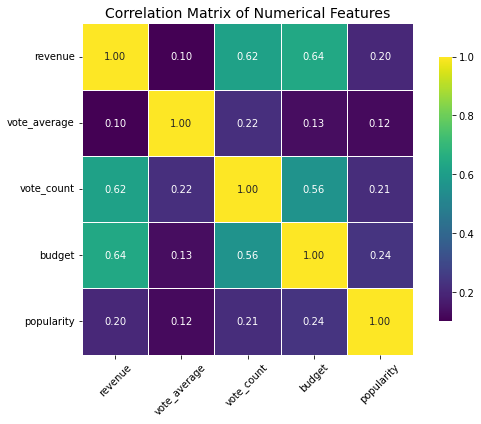

In [0]:
# Convert to Pandas
df_corr = train_df.select(numerical_features_target).toPandas()

# Plot correlation matrix using a pretty palette
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


---
## Model-Based Importance for Decision Tree
---

In [0]:
# Use full train_df with all features + target
all_features = train_df.drop("revenue").columns

# Assemble features
assembler = VectorAssembler(inputCols=all_features, outputCol="features")
train_assembled = assembler.transform(train_df)

# Fit Decision Tree
tree = DecisionTreeRegressor(featuresCol="features", labelCol="revenue")
model = tree.fit(train_assembled)

# Get feature importances
importances = model.featureImportances.toArray()
feature_importance_list = list(zip(all_features, importances))

# Sort and print
sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
print("🔎 Feature Importances (Descending):\n")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

🔎 Feature Importances (Descending):

budget: 0.6034
vote_count: 0.2319
runtime: 0.0499
popularity: 0.0428
comedy: 0.0319
adult: 0.0151
sequel: 0.0141
adventure: 0.0051
universal_pictures: 0.0033
vote_average: 0.0025
en_bool: 0.0000
tagline_bool: 0.0000
action: 0.0000
drama: 0.0000
thriller: 0.0000
warner_bros_pictures: 0.0000
20th_century_fox: 0.0000
duringcreditsstinger: 0.0000
based_on_novel_or_book: 0.0000
status_released: 0.0000


---
## Chi-Square Test (for categorical/boolean features)
---

In [0]:
# Discretize the revenue target into quantile buckets
discretizer = QuantileDiscretizer(numBuckets=4, inputCol="revenue", outputCol="revenue_bucket")
train_binned = discretizer.fit(train_df).transform(train_df)

# Combine boolean + categorical features
categorical_and_boolean_features = boolean_features + categorical_features

# Assemble into feature vector
assembler = VectorAssembler(inputCols=categorical_and_boolean_features, outputCol="features")
assembled = assembler.transform(train_binned)

# Apply Chi-Square feature selection
selector = ChiSqSelector(numTopFeatures=10, featuresCol="features", labelCol="revenue_bucket", outputCol="selected_features")
selector_model = selector.fit(assembled)

# Get selected feature indices
selected_feature_indices = selector_model.selectedFeatures

# Print feature names
print("Top features selected by Chi-Square test:")
for i in selected_feature_indices:
    print(f"- {categorical_and_boolean_features[i]}")

Top features selected by Chi-Square test:
- adult
- en_bool
- tagline_bool
- action
- adventure
- comedy
- drama
- thriller
- warner_bros_pictures
- universal_pictures


---
## Lasso Regression (L1 Regularization)
---

In [0]:
# L1 regression = Lasso
lr = LinearRegression(featuresCol="features", labelCol="revenue", elasticNetParam=1.0, regParam=0.3)
model = lr.fit(train_assembled)

# Zip coefficients with feature names
coefficients = model.coefficients.toArray()
feature_names = assembler.getInputCols()

coef_feature_pairs = list(zip(feature_names, coefficients))

# Sort by absolute value (importance)
sorted_pairs = sorted(coef_feature_pairs, key=lambda x: abs(x[1]), reverse=True)

print("Feature Importances from L1-Regularized Linear Regression (Lasso):\n")
for feature, coef in sorted_pairs:
    if coef != 0.0:
        direction = "positive" if coef > 0 else "negative"
        print(f"- {feature}: {coef:.4f} ({direction} relationship with revenue)")
    else:
        print(f"- {feature}: {coef:.4f} (excluded by L1 regularization)")


Feature Importances from L1-Regularized Linear Regression (Lasso):

- based_on_novel_or_book: -21368374.8052 (negative relationship with revenue)
- duringcreditsstinger: -10876897.8249 (negative relationship with revenue)
- universal_pictures: 7479538.2363 (positive relationship with revenue)
- action: 6004187.1216 (positive relationship with revenue)
- sequel: -5885103.3363 (negative relationship with revenue)
- warner_bros_pictures: -5539276.7079 (negative relationship with revenue)
- drama: -4438098.2273 (negative relationship with revenue)
- thriller: -3276075.9482 (negative relationship with revenue)
- status_released: 2137632.3797 (positive relationship with revenue)
- adult: -1784554.3743 (negative relationship with revenue)
- 20th_century_fox: 790678.6609 (positive relationship with revenue)
- tagline_bool: 141113.3107 (positive relationship with revenue)
- comedy: 50751.5683 (positive relationship with revenue)
- en_bool: 23645.2475 (positive relationship with revenue)
- adven

---
## Define final features
---

In [0]:
final_features = [
    "budget", "vote_count", "runtime", "popularity", "comedy",
    "adult", "sequel", "adventure", "universal_pictures", "vote_average"
]

---
## Assemble datasets
---

In [0]:
assembler = VectorAssembler(inputCols=final_features, outputCol="features")

train_prepared = assembler.transform(train_df.select(*final_features, "revenue"))
test_prepared = assembler.transform(test_df.select(*final_features, "revenue"))


---
## Train and evaluate models
---
We'll train and compare:

1. Linear Regression

2. Decision Tree Regressor

3. Random Forest Regressor

4. GBT Regressor (Gradient-Boosted Trees)

In [0]:

evaluator = RegressionEvaluator(labelCol="revenue", predictionCol="prediction", metricName="rmse")
results = []


---
## Linear Regression with Cross-Validation
---

In [0]:
lr = LinearRegression(featuresCol="features", labelCol="revenue")

lr_param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.3, 0.5]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

lr_cv = CrossValidator(estimator=lr,
                       estimatorParamMaps=lr_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

lr_model = lr_cv.fit(train_prepared)
lr_rmse, lr_r2 = evaluate_model(lr_model.bestModel, test_prepared)
results.append(("Linear Regression (CV)", lr_rmse, lr_r2))


---
## Decision Tree with Cross-Validation
---

In [0]:
dt = DecisionTreeRegressor(featuresCol="features", labelCol="revenue")

dt_param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 5, 10]) \
    .build()

dt_cv = CrossValidator(estimator=dt,
                       estimatorParamMaps=dt_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

dt_model = dt_cv.fit(train_prepared)
dt_rmse, dt_r2 = evaluate_model(dt_model.bestModel, test_prepared)
results.append(("Decision Tree (CV)", dt_rmse, dt_r2))


---
## Random Forest with Cross-Validation
---

In [0]:
rf = RandomForestRegressor(featuresCol="features", labelCol="revenue")

rf_param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

rf_cv = CrossValidator(estimator=rf,
                       estimatorParamMaps=rf_param_grid,
                       evaluator=evaluator,
                       numFolds=3)

rf_model = rf_cv.fit(train_prepared)
rf_rmse, rf_r2 = evaluate_model(rf_model.bestModel, test_prepared)
results.append(("Random Forest (CV)", rf_rmse, rf_r2))


---
## Gradient Boosted Trees (GBT) with Cross-Validation
---

In [0]:
gbt = GBTRegressor(featuresCol="features", labelCol="revenue")

gbt_param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxIter, [50, 100]) \
    .addGrid(gbt.maxDepth, [3, 5]) \
    .build()

gbt_cv = CrossValidator(estimator=gbt,
                        estimatorParamMaps=gbt_param_grid,
                        evaluator=evaluator,
                        numFolds=3)

gbt_model = gbt_cv.fit(train_prepared)
gbt_rmse, gbt_r2 = evaluate_model(gbt_model.bestModel, test_prepared)
results.append(("Gradient Boosted Trees (CV)", gbt_rmse, gbt_r2))


---
## Comparison of the 4 models
---

In [0]:
print("\n Model Performance Comparison (with Cross-Validation)")
print("----------------------------------------------------------")
print(f"{'Model':<40} {'RMSE':>10} {'R²':>10}")
print("----------------------------------------------------------")
for name, rmse, r2 in results:
    print(f"{name:<40} {rmse:10.2f} {r2:10.4f}")


 Model Performance Comparison (with Cross-Validation)
----------------------------------------------------------
Model                                          RMSE         R²
----------------------------------------------------------
Linear Regression (CV)                   75383815.47     0.6703
Decision Tree (CV)                       86274027.01     0.5681
Random Forest (CV)                       76937930.87     0.6565
